C:\Users\manee\AppData\Roaming\Python\Python39\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\manee\AppData\Roaming\Python\Python39\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


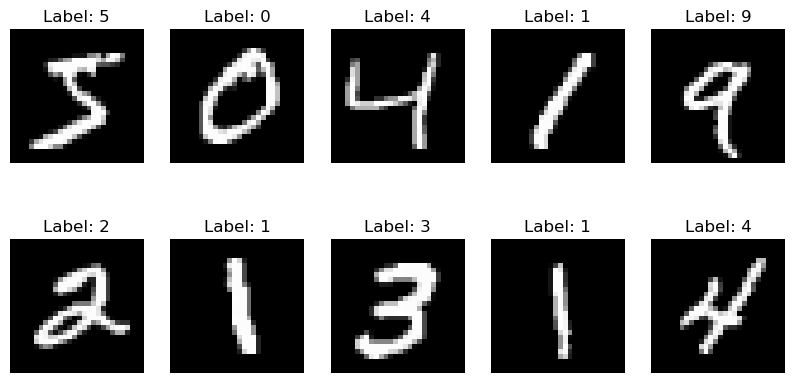

Epoch 1/10
1500/1500 [==============================] - 25s 16ms/step - loss: 0.2236 - accuracy: 0.9323 - val_loss: 0.0556 - val_accuracy: 0.9833
Epoch 2/10
1500/1500 [==============================] - 26s 18ms/step - loss: 0.0844 - accuracy: 0.9745 - val_loss: 0.0476 - val_accuracy: 0.9858
Epoch 3/10
1500/1500 [==============================] - 23s 16ms/step - loss: 0.0642 - accuracy: 0.9808 - val_loss: 0.0441 - val_accuracy: 0.9862
Epoch 4/10
1500/1500 [==============================] - 23s 15ms/step - loss: 0.0513 - accuracy: 0.9843 - val_loss: 0.0332 - val_accuracy: 0.9898
Epoch 5/10
1500/1500 [==============================] - 23s 15ms/step - loss: 0.0412 - accuracy: 0.9872 - val_loss: 0.0342 - val_accuracy: 0.9905
Epoch 6/10
1500/1500 [==============================] - 22s 15ms/step - loss: 0.0369 - accuracy: 0.9888 - val_loss: 0.0320 - val_accuracy: 0.9908
Epoch 7/10
1500/1500 [==============================] - 22s 15ms/step - loss: 0.0329 - accuracy: 0.9897 - val_loss: 0.0386 -

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load MNIST dataset
from tensorflow.keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Handle missing values (if any)
X_train = np.nan_to_num(X_train)
X_test = np.nan_to_num(X_test)

# Exploratory Data Analysis (EDA)
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.show()

# Feature Engineering (Normalization & Reshaping)
X_train = X_train / 255.0
X_test = X_test / 255.0
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# Convert labels to categorical
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Split the data
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Build CNN model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=32)

# Evaluate the model
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)
print("Test Accuracy:", accuracy_score(y_test_classes, y_pred_classes))
print(confusion_matrix(y_test_classes, y_pred_classes))
print(classification_report(y_test_classes, y_pred_classes))

# Model Improvement (Hyperparameter Tuning)
from tensorflow.keras.optimizers import Adam

model_tuned = Sequential([
    Conv2D(64, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D((2,2)),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model_tuned.compile(optimizer=Adam(learning_rate=0.0005), loss='categorical_crossentropy', metrics=['accuracy'])

history_tuned = model_tuned.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=15, batch_size=64)

# Evaluate the improved model
y_pred_tuned = model_tuned.predict(X_test)
y_pred_classes_tuned = np.argmax(y_pred_tuned, axis=1)
print("Tuned Model Accuracy:", accuracy_score(y_test_classes, y_pred_classes_tuned))
print(confusion_matrix(y_test_classes, y_pred_classes_tuned))
print(classification_report(y_test_classes, y_pred_classes_tuned))
